# Implement the main steps of a Shallow Neural Network by sratch

6. Implement the main steps of a Shallow Neural Network
● Understand the dataset
● Implement your first Forward and Backward propagation
● Implement activation function, gradient descent
● Build Neural Network Model
● Test and optimize the model
● Make Predictions
7. Plot following graphs using Python
i. Plotting Sigmoid 2D
ii. Plotting Sigmoid 3D
iii. Contour Plot
8. Plot following graphs using Python
i. Plotting Loss
ii. Standardization
iii. Test/Train split

In [15]:
#Step 1 : Creating the data set using numpy array of 0s and 1s. 
#As the image is a collection of pixel values in matrix, we will create those matrix of pixel for A, B, C 


 
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

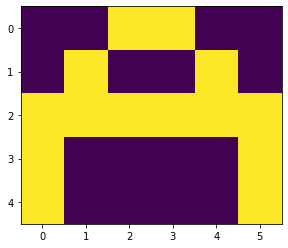

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [17]:
# converting data and labels into numpy array
 
"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""
 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
 
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


### Step 5: Declaring and defining all the function to build deep neural network.

In [19]:
# activation function
 
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
   
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)
 
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# out put of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)
  
# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))
     
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)
   
# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))
 
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
     
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)
 
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)  
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)
  
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()   
   

In [20]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.1739758  -0.53513682 -1.88709718  0.0490623   1.04018813]
 [-0.27967735  0.46474486 -0.21844697  0.8021042  -0.32747956]
 [-0.27705904  0.20856407  2.07982058  1.13520443 -0.0061804 ]
 [ 2.08258689 -0.37759458 -0.30823822 -0.47742021  0.53351437]
 [-1.14135734 -0.19748315 -1.66596076 -0.83157924  0.30534601]
 [ 0.73276583  0.09832934 -1.95253134 -1.22983333 -0.06527531]
 [ 1.12832645  1.76743443 -1.47539999  0.25529141  0.75614056]
 [-0.41334949 -0.98867242 -1.32025771  0.07529395  1.43627278]
 [ 0.00301916 -0.19985714  0.00505299 -2.09551833 -0.31631332]
 [ 0.80341613 -0.24667225 -0.29706491  1.23525271  2.21989497]
 [ 2.38043063 -0.47854141  0.68869866  1.32608761  0.66063579]
 [-0.16019741  0.53592681 -0.29321274 -0.95510937  0.29538895]
 [-0.09655482  2.21146678  0.65459063 -0.51206997 -0.29525407]
 [ 0.28464504 -0.09640651  0.36833454  0.6786503  -0.37080514]
 [ 1.03637488 -0.19661796  0.10233857  0.46118283  0.27001646]
 [-0.45330255 -1.23565014  0.4222501  -0.52984682  0.21

### Step 7 : Training the model.

In [21]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 66.88514424196316
epochs: 2 ======== acc: 70.19937887370133
epochs: 3 ======== acc: 73.48292106668708
epochs: 4 ======== acc: 76.42377810302173
epochs: 5 ======== acc: 78.86787212067445
epochs: 6 ======== acc: 80.8218198789423
epochs: 7 ======== acc: 82.38132029765355
epochs: 8 ======== acc: 83.64574111822543
epochs: 9 ======== acc: 84.6893529943276
epochs: 10 ======== acc: 85.56427171887587
epochs: 11 ======== acc: 86.30767135501493
epochs: 12 ======== acc: 86.9468937907938
epochs: 13 ======== acc: 87.50258473499889
epochs: 14 ======== acc: 87.99063848881966
epochs: 15 ======== acc: 88.42346412731756
epochs: 16 ======== acc: 88.81085232807708
epochs: 17 ======== acc: 89.16059309460618
epochs: 18 ======== acc: 89.4789288732969
epochs: 19 ======== acc: 89.77089370682553
epochs: 20 ======== acc: 90.04057075522188
epochs: 21 ======== acc: 90.29128993709409
epochs: 22 ======== acc: 90.52578090924054
epochs: 23 ======== acc: 90.74629232822515
epochs: 24 ======== acc:

### Step 8 : Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration).

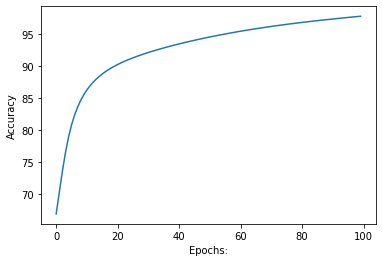

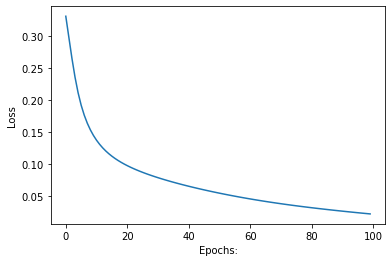

In [23]:
import matplotlib.pyplot as plt1
 
# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [24]:
# the trained weights are
print(w1, "\n", w2)

[[-1.73975796e-01 -5.35136824e-01 -1.88709718e+00  4.90622994e-02
   1.04018813e+00]
 [-4.49994805e-01  6.36920579e-01 -1.19120346e-01  1.10958064e+00
  -2.69352838e-01]
 [-4.51078639e-01  7.05723847e-01  2.17917053e+00  1.02526669e+00
   6.21784834e-02]
 [ 1.90856728e+00  1.19565203e-01 -2.08888279e-01 -5.87357952e-01
   6.01873255e-01]
 [-1.31167480e+00 -2.53074276e-02 -1.56663414e+00 -5.24102806e-01
   3.63472730e-01]
 [ 7.32765833e-01  9.83293377e-02 -1.95253134e+00 -1.22983333e+00
  -6.52753116e-02]
 [ 1.12832645e+00  1.76743443e+00 -1.47539999e+00  2.55291409e-01
   7.56140563e-01]
 [-5.87369092e-01 -4.91512643e-01 -1.22090777e+00 -3.46437992e-02
   1.50463167e+00]
 [ 3.01916039e-03 -1.99857138e-01  5.05298847e-03 -2.09551833e+00
  -3.16313320e-01]
 [ 8.03416133e-01 -2.46672245e-01 -2.97064906e-01  1.23525271e+00
   2.21989497e+00]
 [ 2.88204012e+00 -2.72146507e-01  8.37146010e-01  9.31720278e-01
   1.91537630e-01]
 [-1.60197405e-01  5.35926808e-01 -2.93212742e-01 -9.55109372e-01

Image is of letter B.


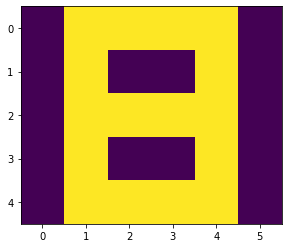

In [25]:
#prediction
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)

# Assignment 2 –Lab:


### Sigmoid Function
The sigmoid function is a special form of the logistic function and is usually denoted by σ(x) or sig(x). It is given by:

σ(x) = 1/(1+exp(-x))

## Plotting Sigmoid 2D 

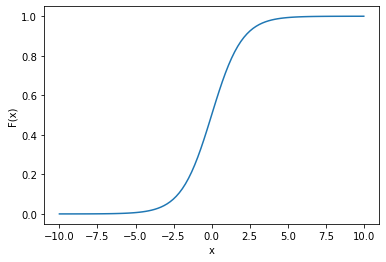

In [138]:
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np

#define range of x-values
x = np.linspace(-10, 10, 100)

#calculate sigmoid function for each x-value
y = expit(x)
  
#create plot
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('F(x)')



#display plot
plt.show()

# plotting 3d graph

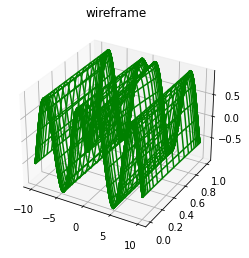

In [146]:
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np

#define range of x-values
x = np.linspace(-10, 10, 100)

#calculate sigmoid function for each x-value
y = expit(x)
  



X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(1)
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='green')
ax.set_title('wireframe');

#display plot
plt.show()

## Contour Plot 
A contour plot is a graphical method to visualize the 3-D surface by plotting constant Z slices called contours in a 2-D format.
The contour plot is an alternative to a 3-D surface plotA contour plot is a graphical method to visualize the 3-D surface by plotting constant Z slices called contours in a 2-D format.
The contour plot is an alternative to a 3-D surface plot

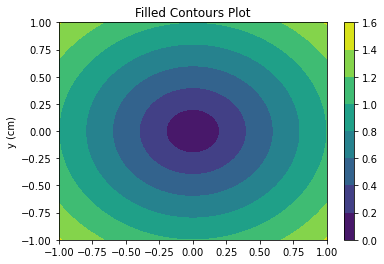

In [29]:
import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-1.0, 1.0, 100)
ylist = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

## Plotting Loss

C:\Users\DELL\AppData\Local\Temp/ipykernel_14808/1556960697.py:2: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


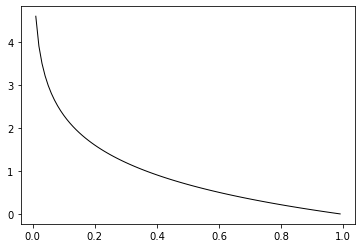

In [30]:
x = np.arange(0, 1, 0.01)
y = -np.log(x)

plt.plot(x, y, color='k', lw=1, linestyle=None)
plt.show()

## Standardization 

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

## Test/Train split

In [35]:
import keras
from tensorflow.keras.datasets.mnist import load_data 
from tensorflow.keras.datasets import mnist 



In [37]:
#loading the MNIST Dataset 

(X_train,y_train), (X_test,Y_test) = mnist.load_data()
train_size = X_train.shape[0]
batch_size = 3
batch_mask = np.random.choice(train_size, batch_size)
print(X_train[batch_mask])
print(y_train[batch_mask])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[0 9 0]
